<a href="https://colab.research.google.com/github/FB-Decipherer/Experiment-1/blob/main/Copy_of_Bounding_Boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install filetype
import cv2
import pytesseract
import filetype
import numpy as np
from google.colab.patches import cv2_imshow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


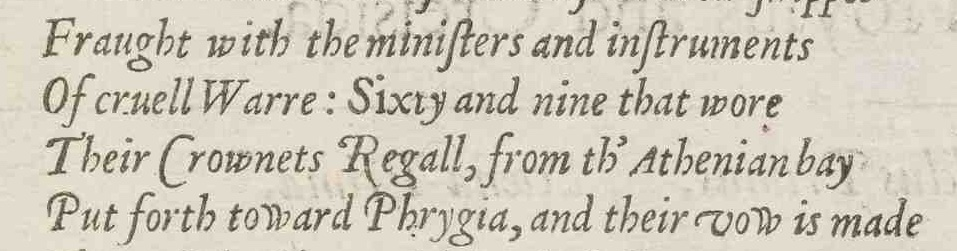

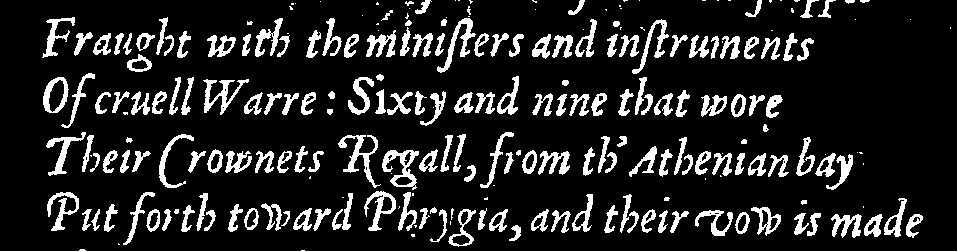

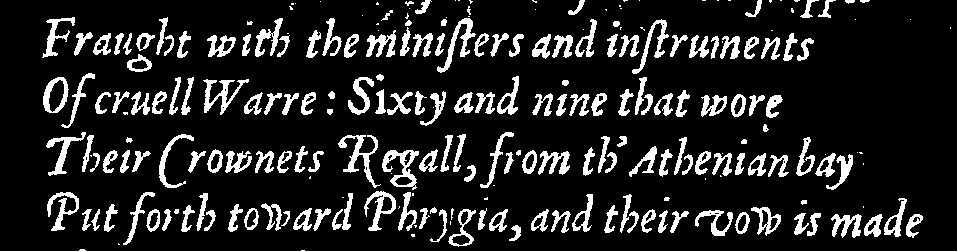

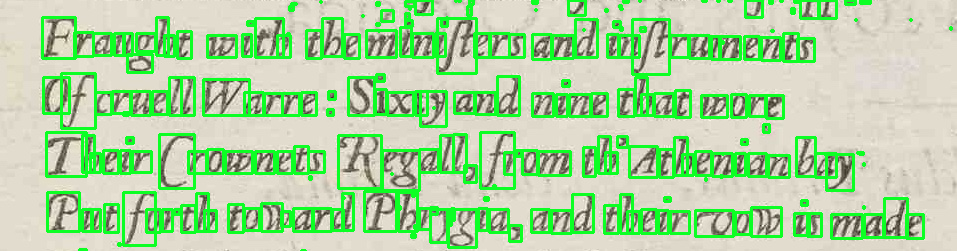

Fraught with the minifters and inftruments

Of cruell Warre : Sixty and nine that wore

Their (rownets Regall, from th Athenian bay
Put forth toward Phrygia, and their vow is made



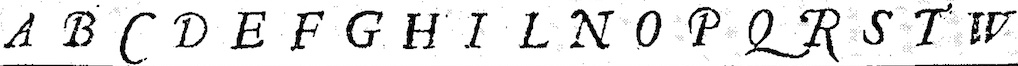

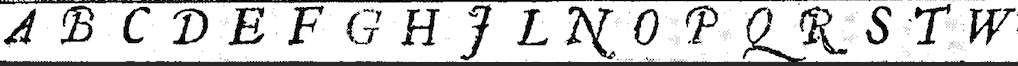

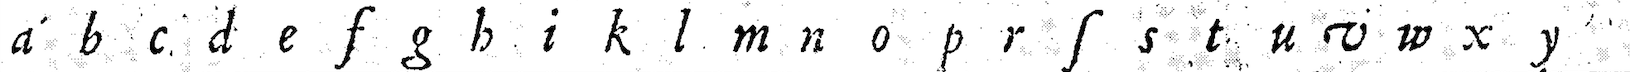

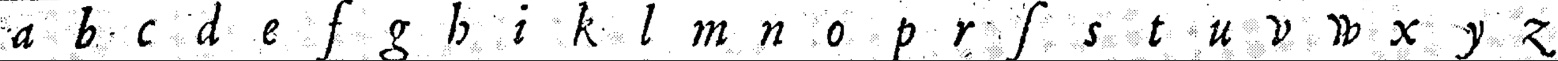

In [3]:

def load_classifiers():
  classifiers = dict( 
                    {'uc0': '/content/drive/MyDrive/Classifiers/uc 0.jpg',
                     'uc1': '/content/drive/MyDrive/Classifiers/uc 1.jpg', 
                     'lc0': '/content/drive/MyDrive/Classifiers/lc 0.png',
                     'lc1': '/content/drive/MyDrive/Classifiers/lc 1.jpg' 
                     } 
                   )

  for the_key, the_value in classifiers.items():
    if filetype.is_image(the_value):
      image = cv2.imread(the_value)
      cv2_imshow(image)

def load_targets():
  targets = dict( 
                    {'abc': '/content/drive/MyDrive/Template Match/TC 4 sentences target image.jpg',
                     'xyz': '/content/drive/MyDrive/Template Match/T-0.jpeg'  
                     } 
                   )

  for the_key, the_value in targets.items():
    if filetype.is_image(the_value):
      image = cv2.imread(the_value)
      cv2_imshow(image)

# load_targets()

# Load target image, grayscale, Otsu's threshold
#image = cv2.imread('/content/drive/MyDrive/Template Match/T-0.jpeg')
target_image = cv2.imread('/content/drive/MyDrive/Template Match/TC 4 sentences target image.jpg')
cv2_imshow(target_image)

gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

# Draw bounding boxes
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(target_image, (x, y), (x + w, y + h), (36,255,12), 2)

# OCR
data = pytesseract.image_to_string(255 - thresh, lang='eng',config='--psm 6')


cv2_imshow(thresh)
cv2_imshow(target_image)

print(data)
load_classifiers()

